# 2019B Semestar Flats Analisys

In this document I present an analisys for all AEON nights of 2019B semester.

In [102]:
import os
import numpy as np
import logging
from ccdproc import ImageFileCollection, CCDData
from IPython.display import display
import matplotlib.pyplot as plt
from goodman_pipeline.core import image_trim

logging.disable()

KEYWORDS = ['slit',
            'grating',
            'cam_targ',
            'grt_targ',
            'filter',
            'filter2',
            'gsp_tech',
            'gain',
            'roi',
            'wavmode',
            'exptime',
            'rdnoise']


data_location = '/user/simon/data/soar/flat_analisis_2019B'

all_files = []
for data_dir in sorted(os.listdir(data_location)):
    for _file in os.listdir(os.path.join(data_location, data_dir, 'masters')):
        all_files.append(os.path.join(data_location, data_dir, 'masters', _file))
# for _input in sorted(all_files):
#     print(_input)

def get_flat_files_as_pandas_dataframe():
    ifc = ImageFileCollection(filenames=all_files, keywords=KEYWORDS, glob_include='*.fits')
    df = ifc.summary.to_pandas()
    groups = df.groupby(['slit',
                         'grating',
                         'cam_targ',
                         'grt_targ',
                         'filter',
                         'filter2',
                         'gsp_tech',
                         'gain',
                         'roi',
                         'wavmode',
                         'exptime',
                         'rdnoise']).size().reset_index().rename(
        columns={0: 'count'})
    all_groups = []
    for i in groups.index:
        conf_group = df[((df['slit'] == groups.iloc[i]['slit']) &
                         (df['grating'] == groups.iloc[i]['grating']) &
                         (df['cam_targ'] == groups.iloc[i]['cam_targ']) &
                         (df['grt_targ'] == groups.iloc[i]['grt_targ']) &
                         (df['filter'] == groups.iloc[i]['filter']) &
                         (df['filter2'] == groups.iloc[i]['filter2']) &
                         (df['gsp_tech'] == groups.iloc[i]['gsp_tech']) &
                         (df['gain'] == groups.iloc[i]['gain']) &
                         (df['roi'] == groups.iloc[i]['roi']) &
                         (df['wavmode'] == groups.iloc[i]['wavmode']) &
                         (df['exptime'] == groups.iloc[i]['exptime']) &
                         (df['rdnoise'] == groups.iloc[i]['rdnoise']))]
        all_groups.append(conf_group.sort_values(by='file'))

    return all_groups

In [103]:
all_groups = get_flat_files_as_pandas_dataframe()

## Tabulated Data

After collecting all master flats obtained during the semester **2019B** they are grouped together using **AND** logic for the values of the following header keywords.

  - `SLIT` : Name of the slit
  - `GRATING`: Name of the grating
  - `CAM_TARG`: Camera Angle Target value (predefined)
  - `GRT_TARG`: Grating Angle Target value (predefined)
  - `FILTER`: Filter in first filter wheel, generaly used for Imaging filters
  - `FILTER2`: Filter in second filter wheel, generaly used for Spectroscopy
  - `GSP_TECH`: Keyword addded by the goodman Pipeline that is a shortcut for know if is Imaging or Spectroscopy data
  - `GAIN`: Gain
  - `RDNOISE`: Readout Noise
  - `ROI`: Region of interest
  - `WAVMODE`: Combination of grating l/mm value with name of fixed (predefined) mode or Imaging
  - `EXPTIME`: Exposure time 
                        

In [104]:
for group in all_groups:
    display(group)
    if len(group) == 1:
        print(group.file.tolist())

file            slit  \
49   /user/simon/data/soar/flat_analisis_2019B/2019...  0.45_LONG_SLIT   
61   /user/simon/data/soar/flat_analisis_2019B/2019...  0.45_LONG_SLIT   
74   /user/simon/data/soar/flat_analisis_2019B/2019...  0.45_LONG_SLIT   
81   /user/simon/data/soar/flat_analisis_2019B/2019...  0.45_LONG_SLIT   
88   /user/simon/data/soar/flat_analisis_2019B/2019...  0.45_LONG_SLIT   
95   /user/simon/data/soar/flat_analisis_2019B/2019...  0.45_LONG_SLIT   
102  /user/simon/data/soar/flat_analisis_2019B/2019...  0.45_LONG_SLIT   
109  /user/simon/data/soar/flat_analisis_2019B/2020...  0.45_LONG_SLIT   
116  /user/simon/data/soar/flat_analisis_2019B/2020...  0.45_LONG_SLIT   
123  /user/simon/data/soar/flat_analisis_2019B/2020...  0.45_LONG_SLIT   

       grating  cam_targ  grt_targ     filter filter2      gsp_tech  gain  \
49   2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
61   2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
74   2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
81   2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
88   2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
95   2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
102  2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
109  2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
116  2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   
123  2100_SYZY     86.08     43.04  NO_FILTER   GG455  Spectroscopy  1.48   

                    roi   wavmode  exptime  rdnoise  
49   Custom from Script  2100_650     20.0     3.89  
61   Custom from Script  2100_650     20.0     3.89  
74   Custom from Script  2100_650     20.0     3.89  
81   Custom from Script  2100_650     20.0     3.89  
88   Custom from Script  2100_650     20.0     3.89  
95   Custom from Script  2100_650     20.0     3.89  
102  Custom from Script  2100_650     20.0     3.89  
109  Custom from Script  2100_650     20.0     3.89  
116  Custom from Script  2100_650     20.0     3.89  
123  Custom from Script  2100_650     20.0     3.89

file           slit  \
57  /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   

     grating  cam_targ  grt_targ  filter filter2      gsp_tech  gain  \
57  400_SYZY       0.0     0.661  g-SDSS   GG455  Spectroscopy  1.48   

            roi  wavmode  exptime  rdnoise  
57  Imaging 2x2  IMAGING      2.5     3.89

['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_IMAGING_GG455.fits']


file           slit  \
56  /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   

     grating  cam_targ  grt_targ       filter filter2      gsp_tech  gain  \
56  400_SYZY      11.6       5.8  <NO_FILTER>   GG455  Spectroscopy  1.48   

                  roi wavmode  exptime  rdnoise  
56  Spectroscopic 2x2  400_M1      6.0     3.89

['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_400_M1_GG455.fits']


file           slit  \
1    /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
6    /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
12   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
18   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
24   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
30   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
36   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
42   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
48   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
60   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
67   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
73   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
80   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
87   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
94   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
101  /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
108  /user/simon/data/soar/flat_analisis_2019B/2020...  1.0_LONG_SLIT   
115  /user/simon/data/soar/flat_analisis_2019B/2020...  1.0_LONG_SLIT   
122  /user/simon/data/soar/flat_analisis_2019B/2020...  1.0_LONG_SLIT   

      grating  cam_targ  grt_targ     filter    filter2      gsp_tech  gain  \
1    400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
6    400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
12   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
18   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
24   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
30   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
36   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
42   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
48   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
60   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
67   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
73   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
80   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
87   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
94   400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
101  400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
108  400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
115  400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   
122  400_SYZY      11.6       5.8  NO_FILTER  NO_FILTER  Spectroscopy  1.48   

                   roi wavmode  exptime  rdnoise  
1    Spectroscopic 2x2  400_M1      6.0     3.89  
6    Spectroscopic 2x2  400_M1      6.0     3.89  
12   Spectroscopic 2x2  400_M1      6.0     3.89  
18   Spectroscopic 2x2  400_M1      6.0     3.89  
24   Spectroscopic 2x2  400_M1      6.0     3.89  
30   Spectroscopic 2x2  400_M1      6.0     3.89  
36   Spectroscopic 2x2  400_M1      6.0     3.89  
42   Spectroscopic 2x2  400_M1      6.0     3.89  
48   Spectroscopic 2x2  400_M1      6.0     3.89  
60   Spectroscopic 2x2  400_M1      6.0     3.89  
67   Spectroscopic 2x2  400_M1      6.0     3.89  
73   Spectroscopic 2x2  400_M1      6.0     3.89  
80   Spectroscopic 2x2  400_M1      6.0     3.89  
87   Spectroscopic 2x2  400_M1      6.0     3.89  
94   Spectroscopic 2x2  400_M1      6.0     3.89  
101  Spectroscopic 2x2  400_M1      6.0     3.89  
108  Spectroscopic 2x2  400_M1      6.0     3.89  
115  Spectroscopic 2x2  400_M1      6.0     3.89  
122  Spectroscopic 2x2  400_M1      6.0

file           slit  \
55  /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   

     grating  cam_targ  grt_targ  filter      filter2      gsp_tech  gain  \
55  400_SYZY      11.6       5.8  i-SDSS  <NO_FILTER>  Spectroscopy  1.48   

                  roi wavmode  exptime  rdnoise  
55  Spectroscopic 2x2  400_M1      6.0     3.89

['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_400_M1_NO_FILTER.fits']


file           slit  \
54  /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   

     grating  cam_targ  grt_targ       filter filter2      gsp_tech  gain  \
54  400_SYZY      16.1       7.5  <NO_FILTER>   GG455  Spectroscopy  1.48   

                  roi wavmode  exptime  rdnoise  
54  Spectroscopic 2x2  400_M2      5.0     3.89

['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_400_M2_GG455.fits']


file           slit  \
0    /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
5    /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
11   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
17   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
23   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
29   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
35   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
41   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
47   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
59   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
66   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
72   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
79   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
86   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
93   /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
100  /user/simon/data/soar/flat_analisis_2019B/2019...  1.0_LONG_SLIT   
107  /user/simon/data/soar/flat_analisis_2019B/2020...  1.0_LONG_SLIT   
114  /user/simon/data/soar/flat_analisis_2019B/2020...  1.0_LONG_SLIT   
121  /user/simon/data/soar/flat_analisis_2019B/2020...  1.0_LONG_SLIT   

      grating  cam_targ  grt_targ     filter filter2      gsp_tech  gain  \
0    400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
5    400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
11   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
17   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
23   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
29   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
35   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
41   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
47   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
59   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
66   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
72   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
79   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
86   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
93   400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
100  400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
107  400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
114  400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   
121  400_SYZY      16.1       7.5  NO_FILTER   GG455  Spectroscopy  1.48   

                   roi wavmode  exptime  rdnoise  
0    Spectroscopic 2x2  400_M2      5.0     3.89  
5    Spectroscopic 2x2  400_M2      5.0     3.89  
11   Spectroscopic 2x2  400_M2      5.0     3.89  
17   Spectroscopic 2x2  400_M2      5.0     3.89  
23   Spectroscopic 2x2  400_M2      5.0     3.89  
29   Spectroscopic 2x2  400_M2      5.0     3.89  
35   Spectroscopic 2x2  400_M2      5.0     3.89  
41   Spectroscopic 2x2  400_M2      5.0     3.89  
47   Spectroscopic 2x2  400_M2      5.0     3.89  
59   Spectroscopic 2x2  400_M2      5.0     3.89  
66   Spectroscopic 2x2  400_M2      5.0     3.89  
72   Spectroscopic 2x2  400_M2      5.0     3.89  
79   Spectroscopic 2x2  400_M2      5.0     3.89  
86   Spectroscopic 2x2  400_M2      5.0     3.89  
93   Spectroscopic 2x2  400_M2      5.0     3.89  
100  Spectroscopic 2x2  400_M2      5.0     3.89  
107  Spectroscopic 2x2  400_M2      5.0     3.89  
114  Spectroscopic 2x2  400_M2      5.0     3.89  
121  Spectroscopic 2x2  400_M2      5.0     3.89

file       slit  \
58  /user/simon/data/soar/flat_analisis_2019B/2019...  <NO_MASK>   

         grating  cam_targ  grt_targ  filter      filter2      gsp_tech  gain  \
58  <NO_GRATING>       0.0     0.661  r-SDSS  <NO_FILTER>  Spectroscopy  1.48   

            roi  wavmode  exptime  rdnoise  
58  Imaging 2x2  IMAGING      1.0     3.89

['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_IMAGING_NO_FILTER.fits']


file     slit     grating  \
3    /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
8    /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
14   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
20   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
26   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
32   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
38   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
44   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
51   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
63   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
69   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
76   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
83   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
90   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
97   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
104  /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
111  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
118  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
125  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   

     cam_targ  grt_targ filter    filter2 gsp_tech  gain          roi  \
3         0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
8         0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
14        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
20        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
26        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
32        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
38        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
44        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
51        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
63        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
69        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
76        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
83        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
90        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
97        0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
104       0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
111       0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
118       0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   
125       0.0     0.661     VR  NO_FILTER  Imaging  1.48  Imaging 2x2   

     wavmode  exptime  rdnoise  
3    IMAGING      3.0     3.89  
8    IMAGING      3.0     3.89  
14   IMAGING      3.0     3.89  
20   IMAGING      3.0     3.89  
26   IMAGING      3.0     3.89  
32   IMAGING      3.0     3.89  
38   IMAGING      3.0     3.89  
44   IMAGING      3.0     3.89  
51   IMAGING      3.0     3.89  
63   IMAGING      3.0     3.89  
69   IMAGING      3.0     3.89  
76   IMAGING      3.0     3.89  
83   IMAGING      3.0     3.89  
90   IMAGING      3.0     3.89  
97   IMAGING      3.0     3.89  
104  IMAGING      3.0     3.89  
111  IMAGING      3.0     3.89  
118  IMAGING      3.0     3.89  
125  IMAGING      3.0     3.89

file     slit     grating  \
4    /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
9    /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
15   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
21   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
27   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
33   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
39   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
45   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
52   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
64   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
70   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
77   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
84   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
91   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
98   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
105  /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
112  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
119  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
126  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   

     cam_targ  grt_targ  filter    filter2 gsp_tech  gain          roi  \
4         0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
9         0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
15        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
21        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
27        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
33        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
39        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
45        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
52        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
64        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
70        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
77        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
84        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
91        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
98        0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
105       0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
112       0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
119       0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
126       0.0     0.661  g-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   

     wavmode  exptime  rdnoise  
4    IMAGING      2.5     3.89  
9    IMAGING      2.5     3.89  
15   IMAGING      2.5     3.89  
21   IMAGING      2.5     3.89  
27   IMAGING      2.5     3.89  
33   IMAGING      2.5     3.89  
39   IMAGING      2.5     3.89  
45   IMAGING      2.5     3.89  
52   IMAGING      2.5     3.89  
64   IMAGING      2.5     3.89  
70   IMAGING      2.5     3.89  
77   IMAGING      2.5     3.89  
84   IMAGING      2.5     3.89  
91   IMAGING      2.5     3.89  
98   IMAGING      2.5     3.89  
105  IMAGING      2.5     3.89  
112  IMAGING      2.5     3.89  
119  IMAGING      2.5     3.89  
126  IMAGING      2.5     3.89

file     slit     grating  \
10   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
16   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
22   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
28   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
34   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
40   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
46   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
53   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
65   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
71   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
78   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
85   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
92   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
99   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
106  /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
113  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
120  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
127  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   

     cam_targ  grt_targ  filter    filter2 gsp_tech  gain          roi  \
10        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
16        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
22        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
28        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
34        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
40        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
46        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
53        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
65        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
71        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
78        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
85        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
92        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
99        0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
106       0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
113       0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
120       0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
127       0.0     0.661  i-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   

     wavmode  exptime  rdnoise  
10   IMAGING      1.0     3.89  
16   IMAGING      1.0     3.89  
22   IMAGING      1.0     3.89  
28   IMAGING      1.0     3.89  
34   IMAGING      1.0     3.89  
40   IMAGING      1.0     3.89  
46   IMAGING      1.0     3.89  
53   IMAGING      1.0     3.89  
65   IMAGING      1.0     3.89  
71   IMAGING      1.0     3.89  
78   IMAGING      1.0     3.89  
85   IMAGING      1.0     3.89  
92   IMAGING      1.0     3.89  
99   IMAGING      1.0     3.89  
106  IMAGING      1.0     3.89  
113  IMAGING      1.0     3.89  
120  IMAGING      1.0     3.89  
127  IMAGING      1.0     3.89

file     slit     grating  \
7    /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
13   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
19   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
25   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
31   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
37   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
43   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
50   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
62   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
68   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
75   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
82   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
89   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
96   /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
103  /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   
110  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
117  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   
124  /user/simon/data/soar/flat_analisis_2019B/2020...  NO_MASK  NO_GRATING   

     cam_targ  grt_targ  filter    filter2 gsp_tech  gain          roi  \
7         0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
13        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
19        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
25        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
31        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
37        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
43        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
50        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
62        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
68        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
75        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
82        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
89        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
96        0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
103       0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
110       0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
117       0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   
124       0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2   

     wavmode  exptime  rdnoise  
7    IMAGING      1.5     3.89  
13   IMAGING      1.5     3.89  
19   IMAGING      1.5     3.89  
25   IMAGING      1.5     3.89  
31   IMAGING      1.5     3.89  
37   IMAGING      1.5     3.89  
43   IMAGING      1.5     3.89  
50   IMAGING      1.5     3.89  
62   IMAGING      1.5     3.89  
68   IMAGING      1.5     3.89  
75   IMAGING      1.5     3.89  
82   IMAGING      1.5     3.89  
89   IMAGING      1.5     3.89  
96   IMAGING      1.5     3.89  
103  IMAGING      1.5     3.89  
110  IMAGING      1.5     3.89  
117  IMAGING      1.5     3.89  
124  IMAGING      1.5     3.89

file     slit     grating  \
2  /user/simon/data/soar/flat_analisis_2019B/2019...  NO_MASK  NO_GRATING   

   cam_targ  grt_targ  filter    filter2 gsp_tech  gain          roi  wavmode  \
2       0.0     0.661  r-SDSS  NO_FILTER  Imaging  1.48  Imaging 2x2  IMAGING   

   exptime  rdnoise  
2      2.0     3.89

['/user/simon/data/soar/flat_analisis_2019B/2019-08-06/masters/master_flat_IMAGING_r-SDSS.fits']


## Grid Visualization

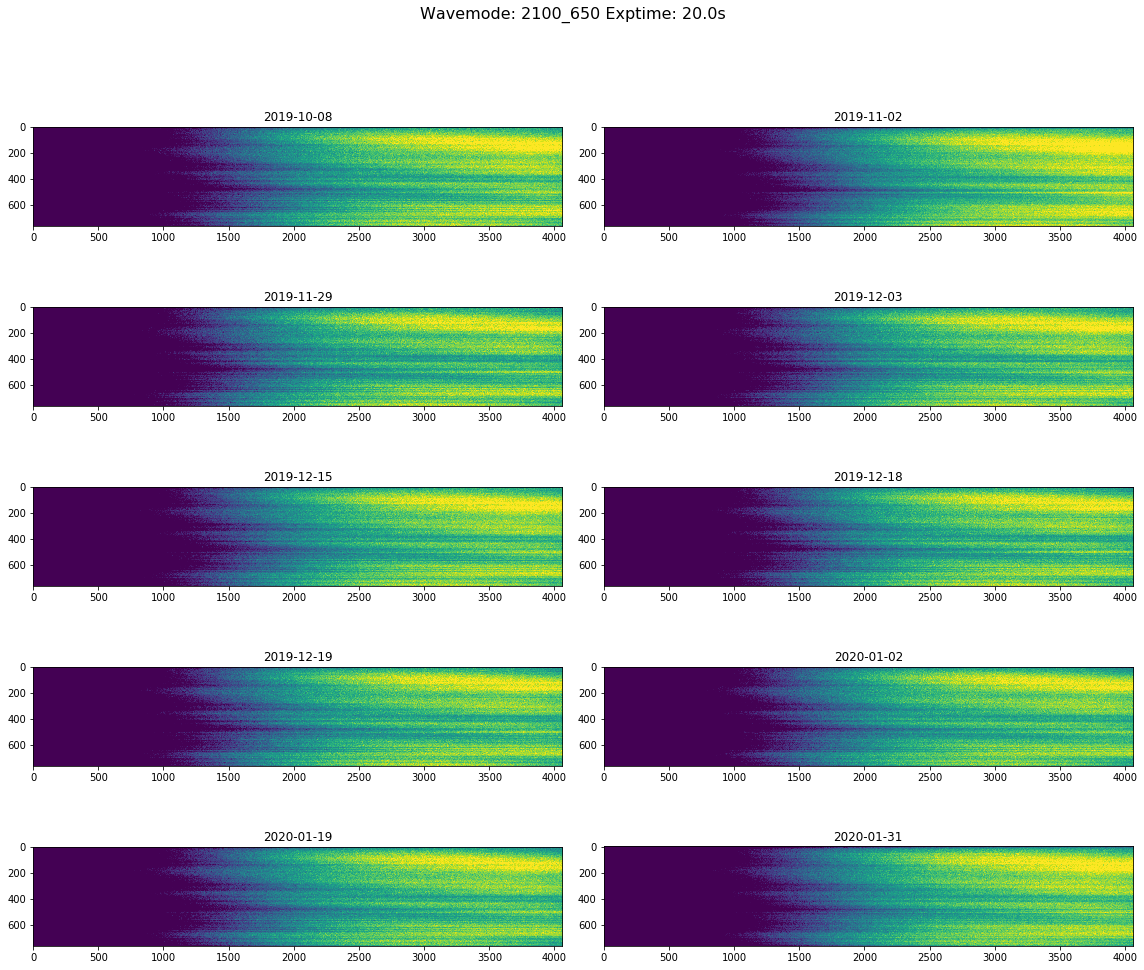

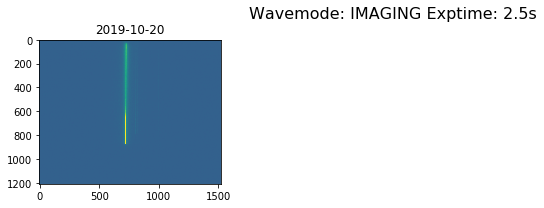

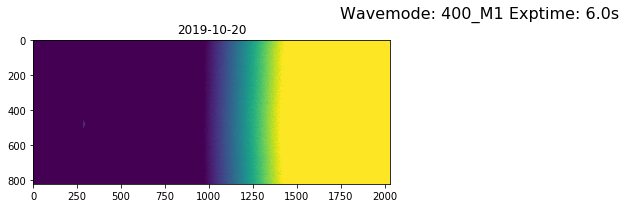

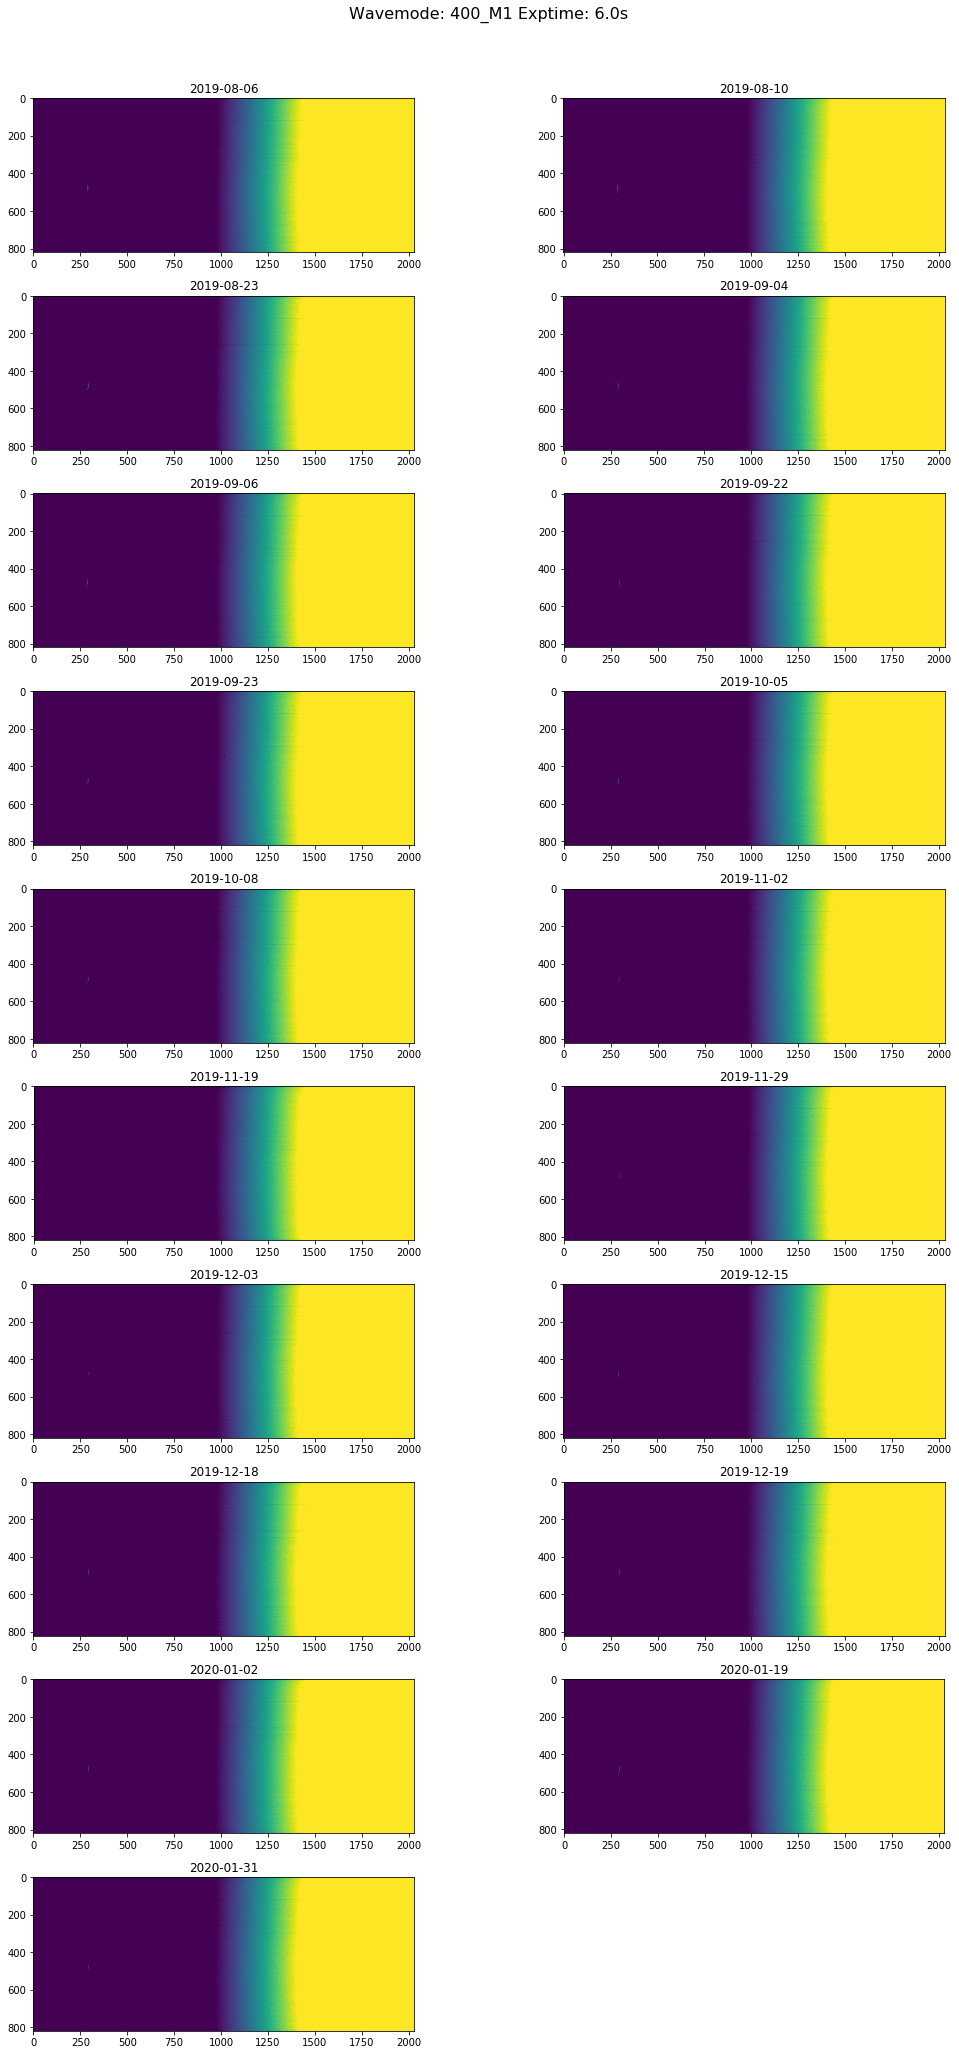

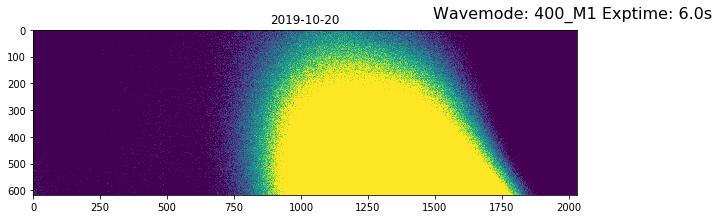

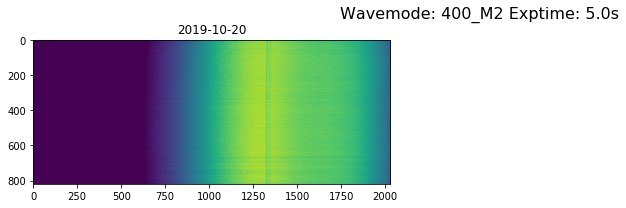

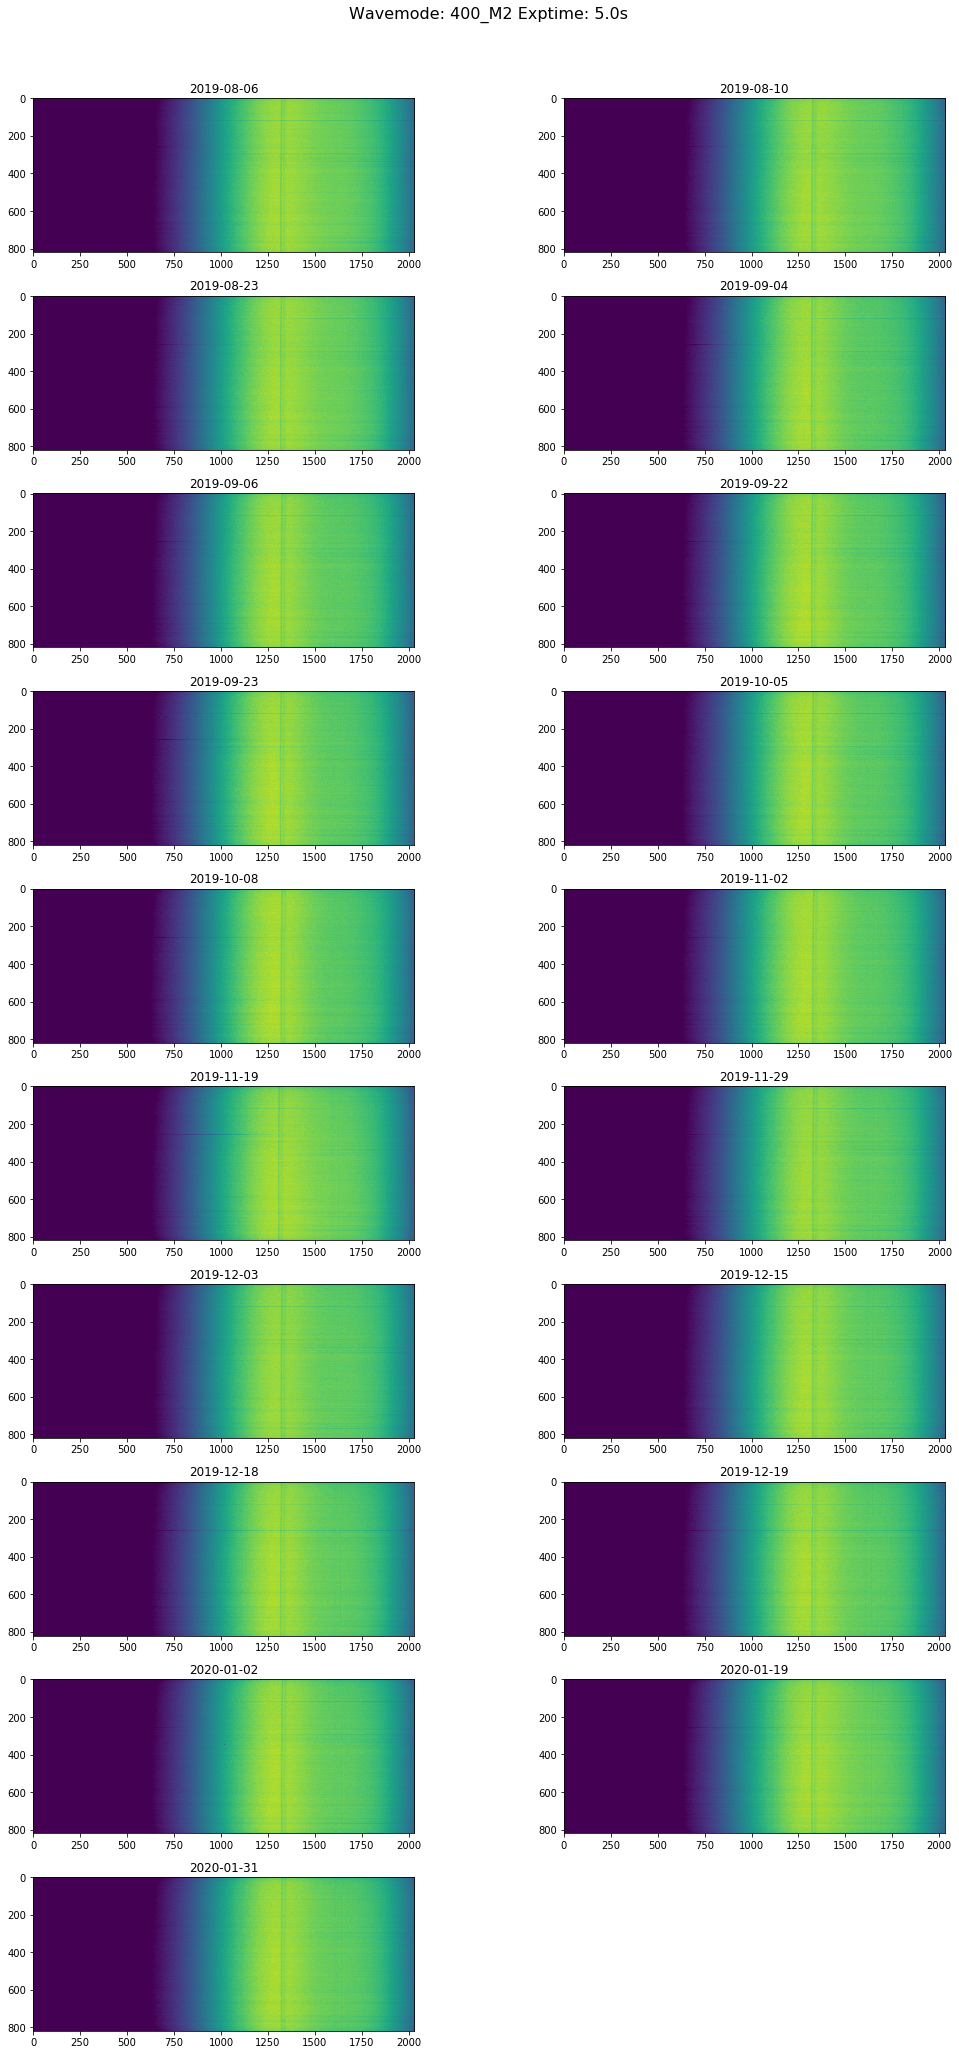

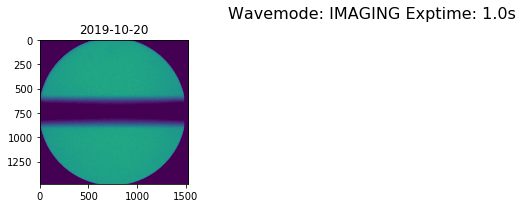

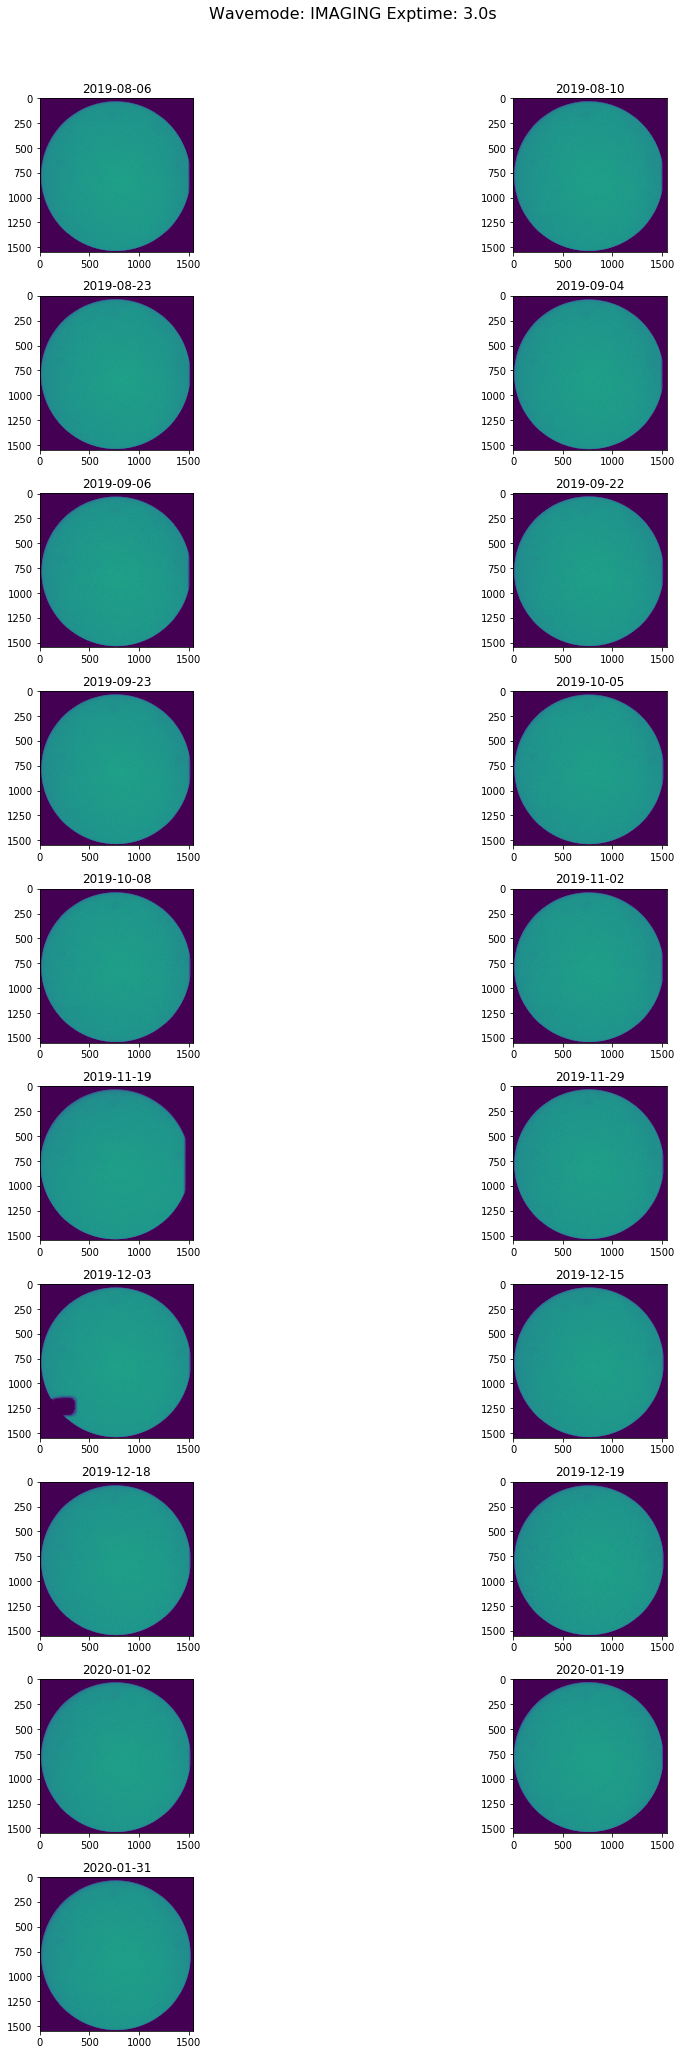

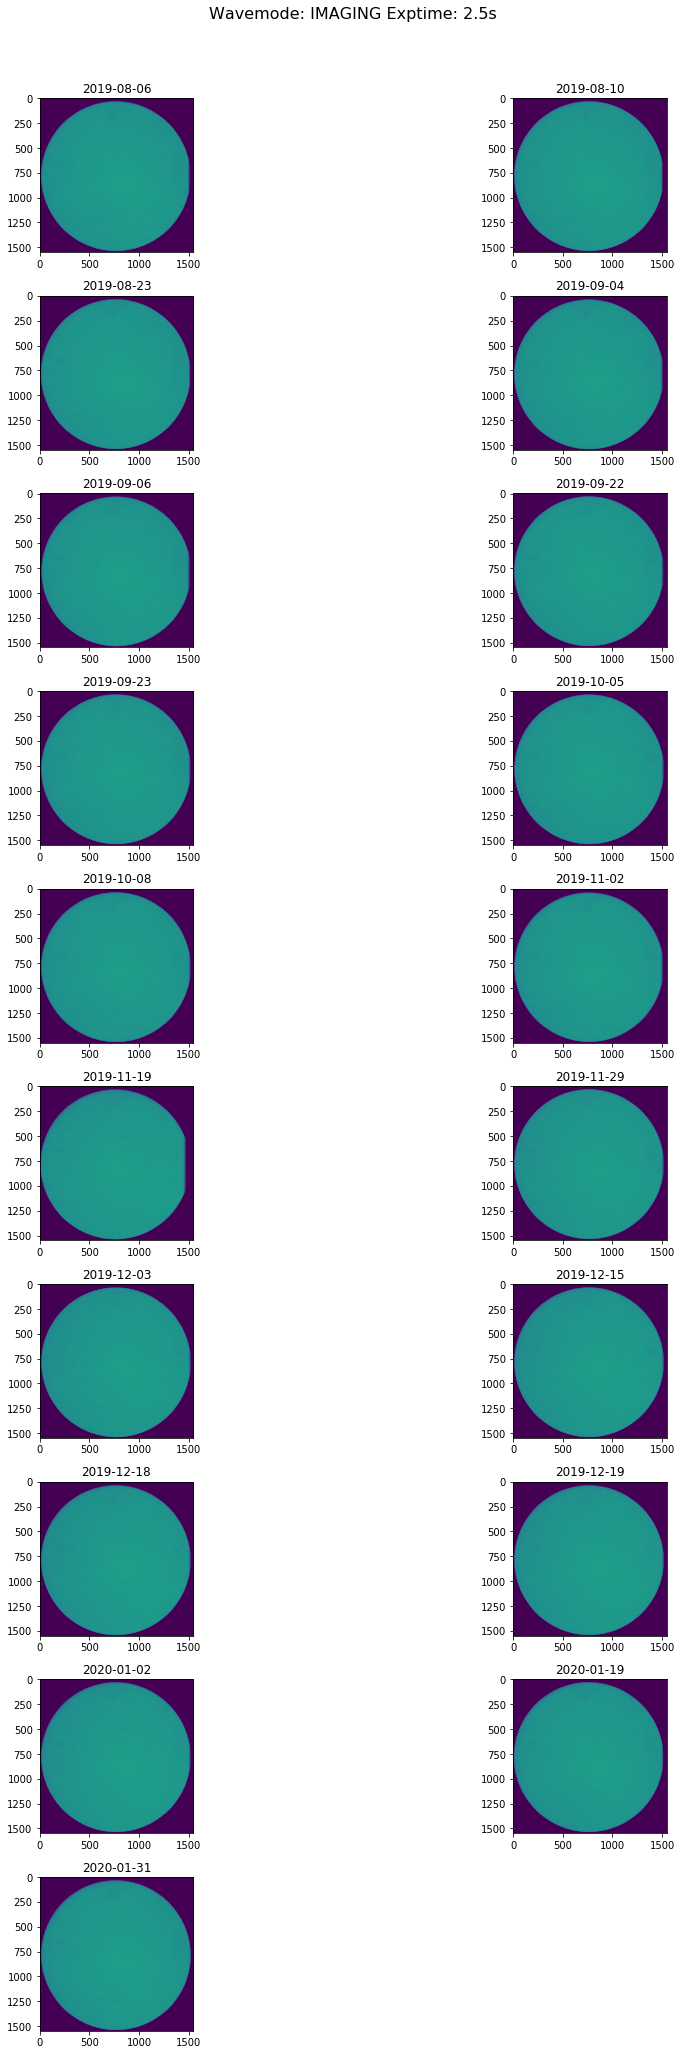

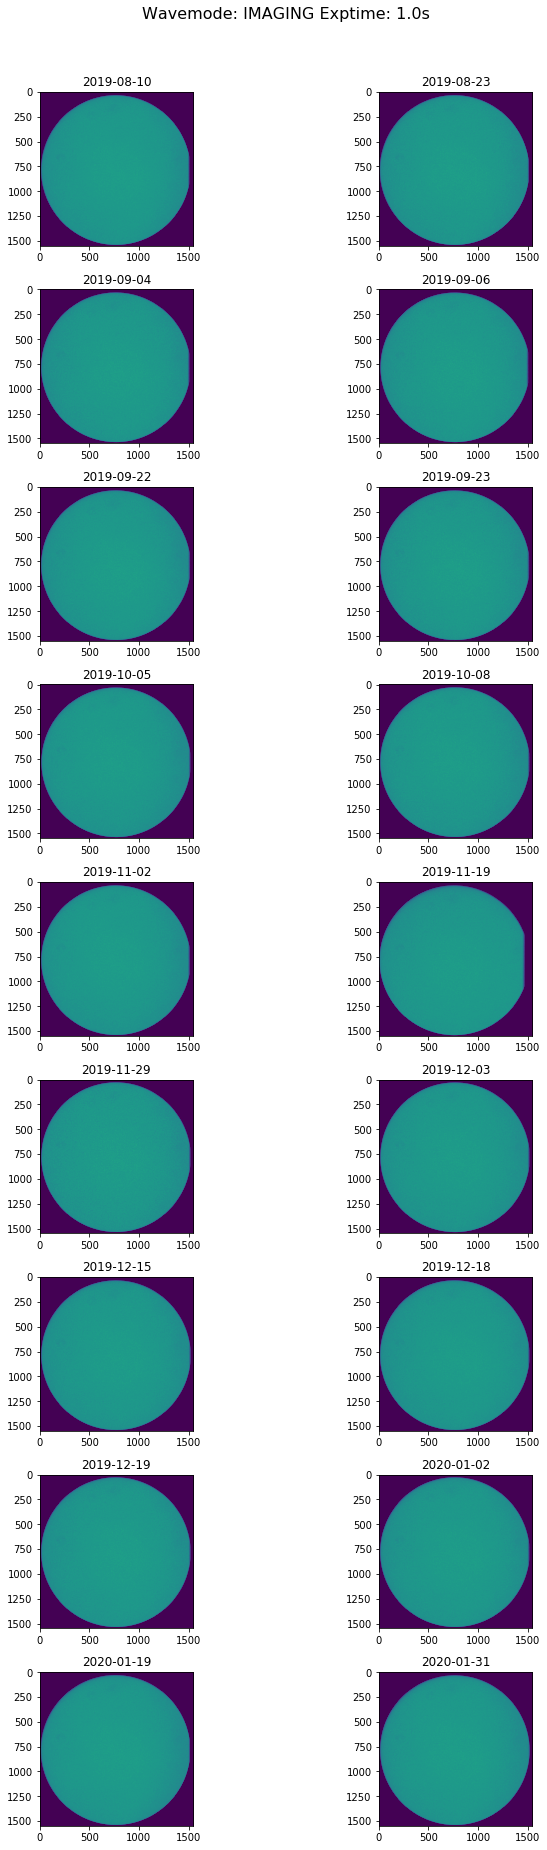

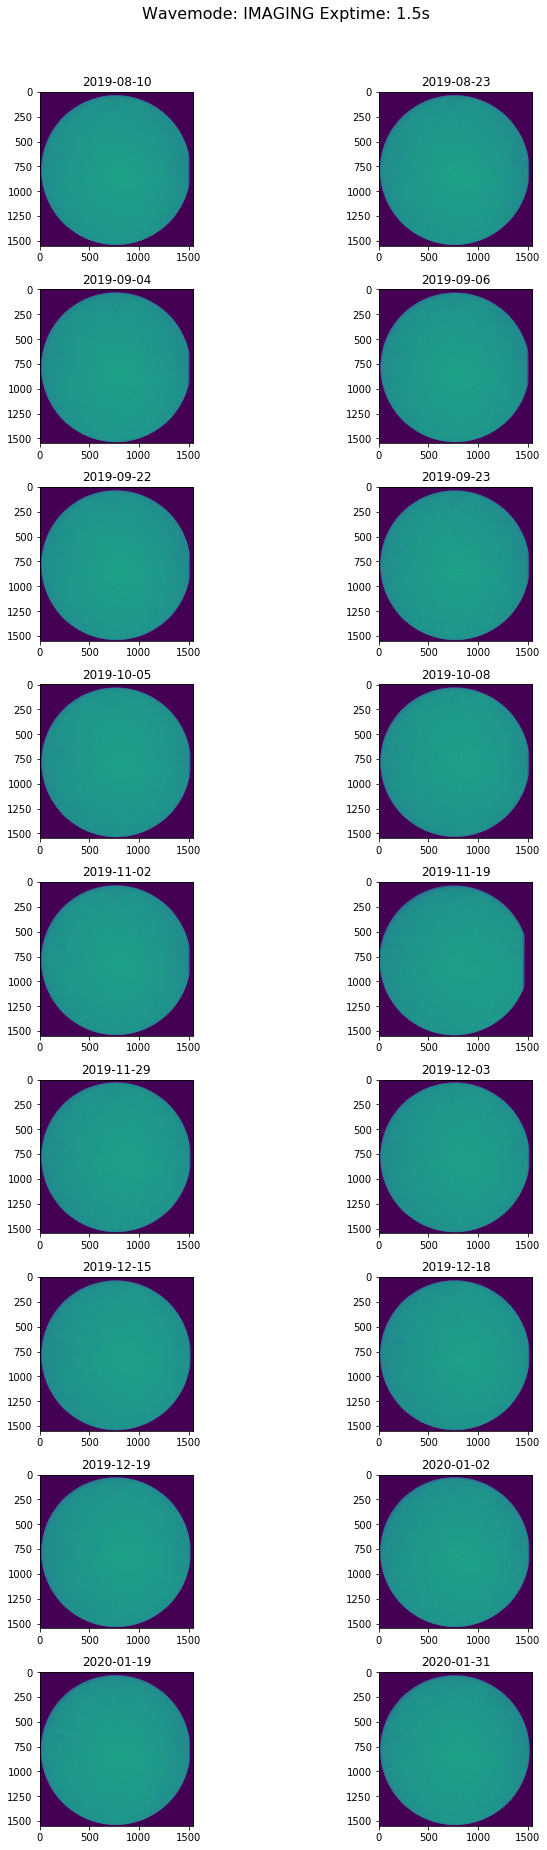

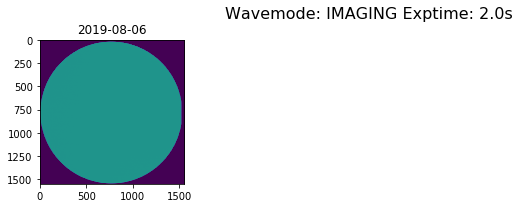

In [105]:
def visualize_as_grid(group):
    group_name = "Wavemode: {} Exptime: {}s".format(group.wavmode.unique()[0], group.exptime.unique()[0])
    nrows = int(np.ceil(len(group)/2.))
    ncols = 2
#     fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize = (16, nrows * 3 ))
   
    fig = plt.figure(figsize = (16, nrows * 3 ))
    fig.suptitle(group_name, fontsize=16)
    gs = fig.add_gridspec(ncols=ncols, nrows=nrows)
    for i, fits_file in enumerate(group.file.tolist()):
        ccd = CCDData.read(fits_file, unit='adu')
        z1 = np.mean(ccd.data) - 0.5 * np.std(ccd.data)
        z2 = np.median(ccd.data) + np.std(ccd.data)
        if i%2 == 0:
            y=0
        else:
            y=1
        ax_x = fig.add_subplot(gs[int(np.floor(i/2.)), y])
        ax_x.imshow(ccd.data, clim=(z1, z2), cmap='viridis')
        ax_x.title.set_text(ccd.header['DATE'])
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
        
for group in all_groups:
    visualize_as_grid(group=group)

## Statistics

Spectroscopy group, Wavmode: 2100_650


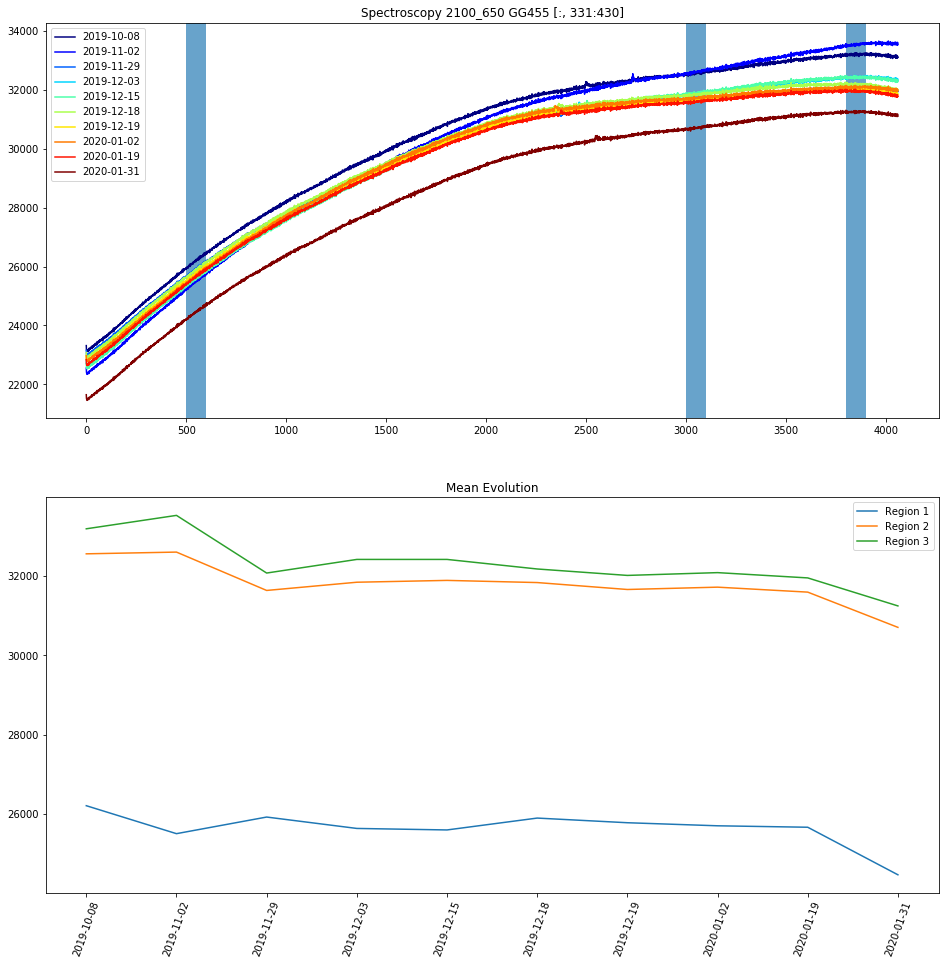

Ignoring file ['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_IMAGING_GG455.fits']
Ignoring file ['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_400_M1_GG455.fits']
Spectroscopy group, Wavmode: 400_M1


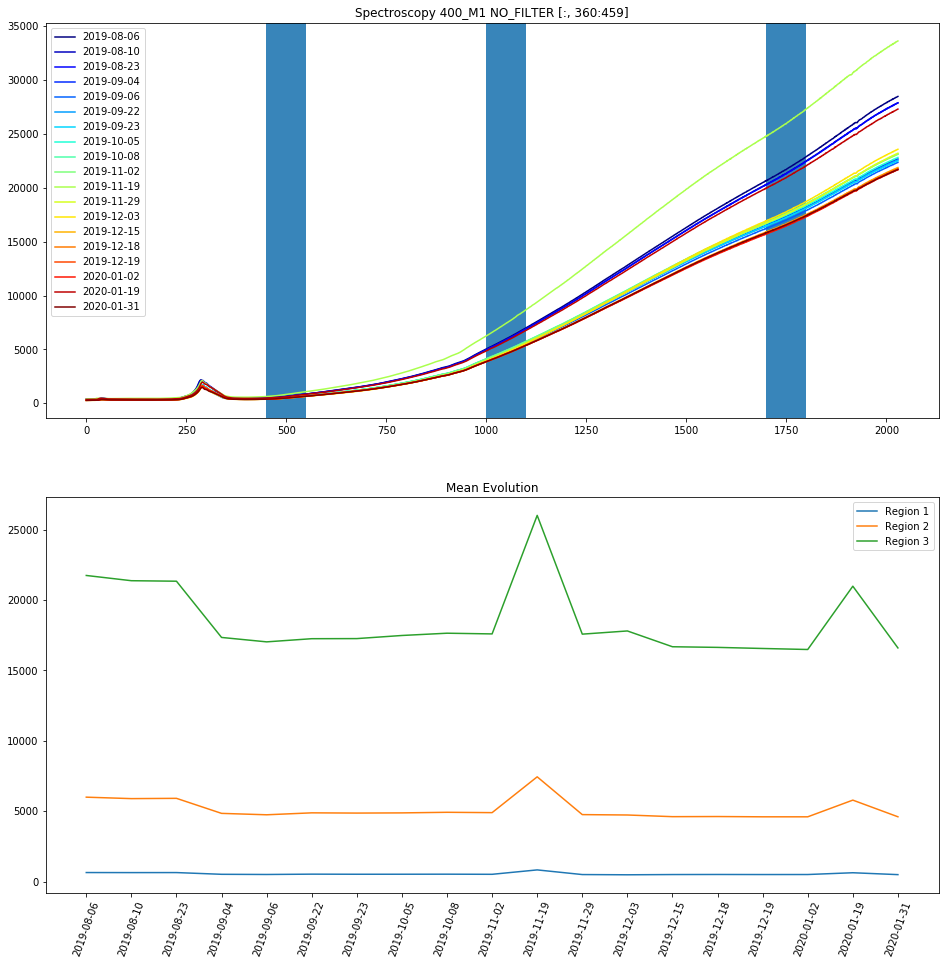

Ignoring file ['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_400_M1_NO_FILTER.fits']
Ignoring file ['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_400_M2_GG455.fits']
Spectroscopy group, Wavmode: 400_M2


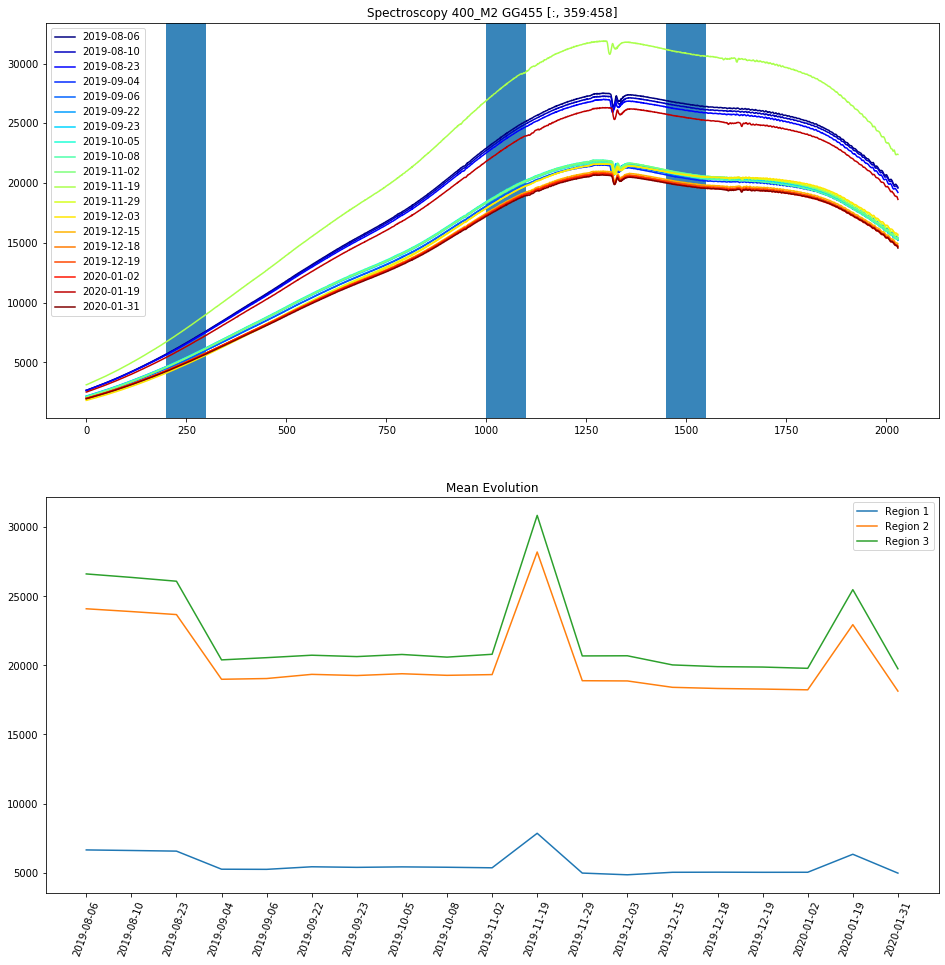

Ignoring file ['/user/simon/data/soar/flat_analisis_2019B/2019-10-20/masters/master_flat_IMAGING_NO_FILTER.fits']
Imaging Master Flats Filter: VR


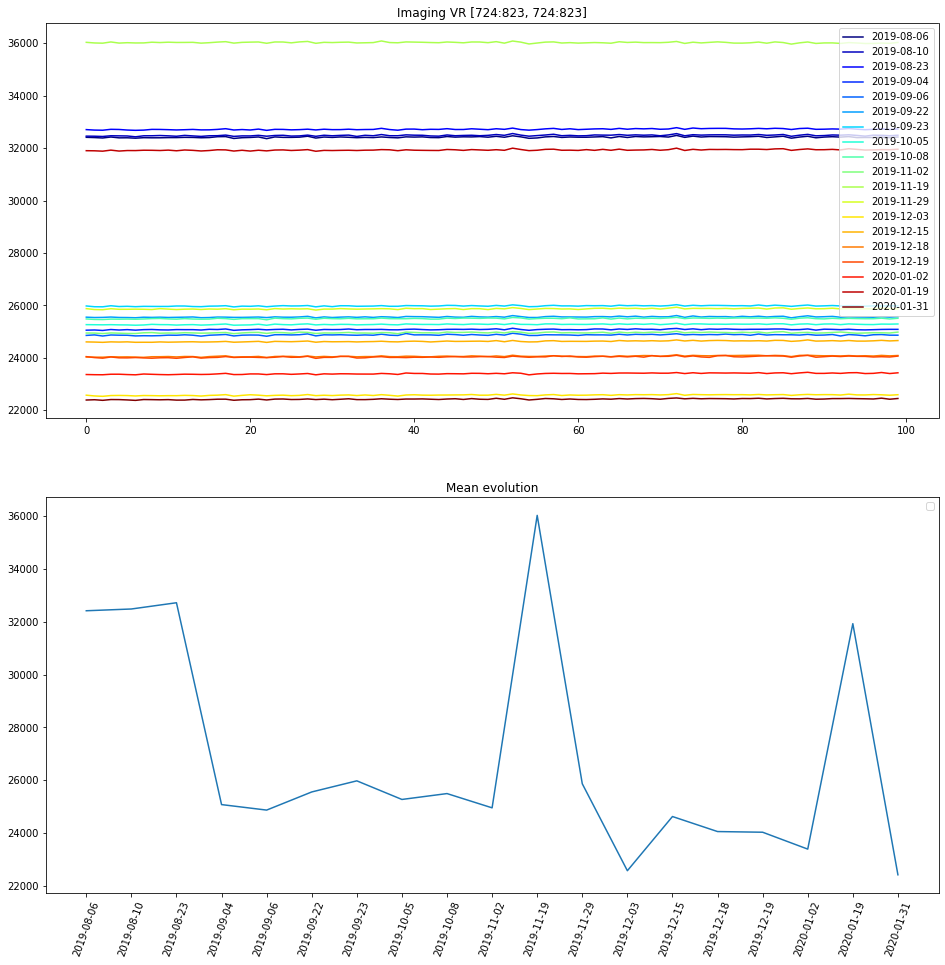

Imaging Master Flats Filter: g-SDSS


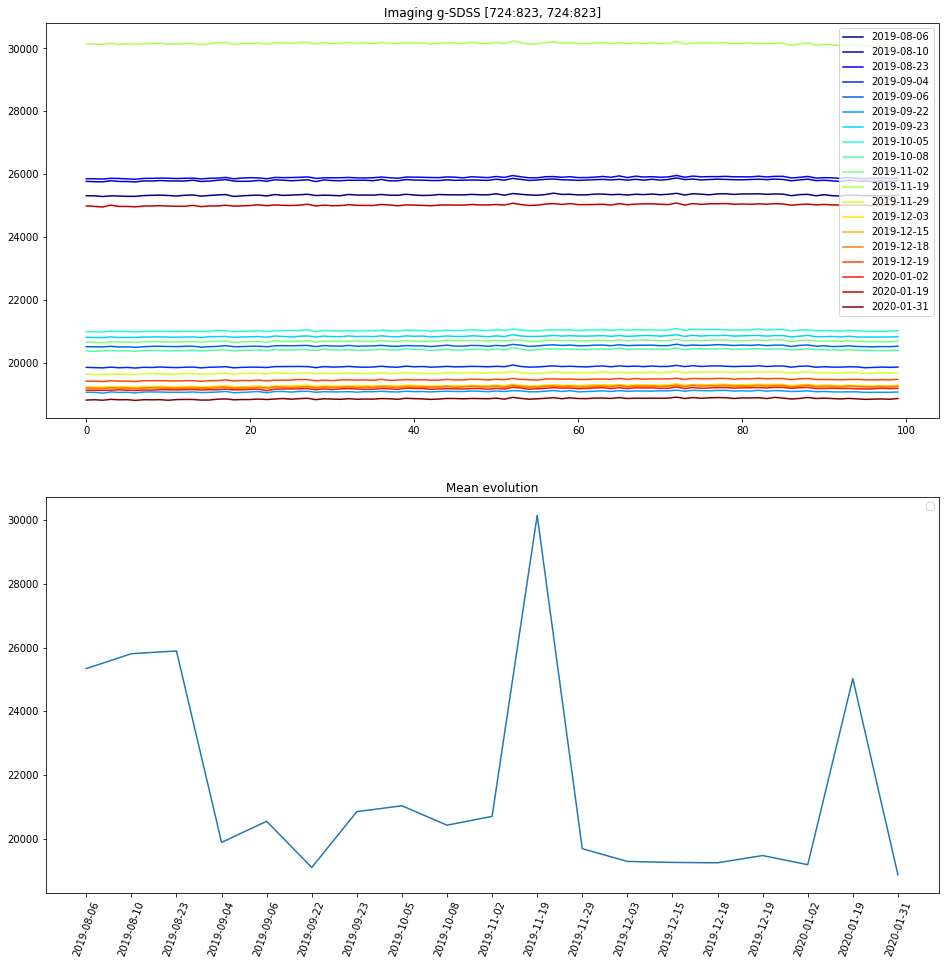

Imaging Master Flats Filter: i-SDSS


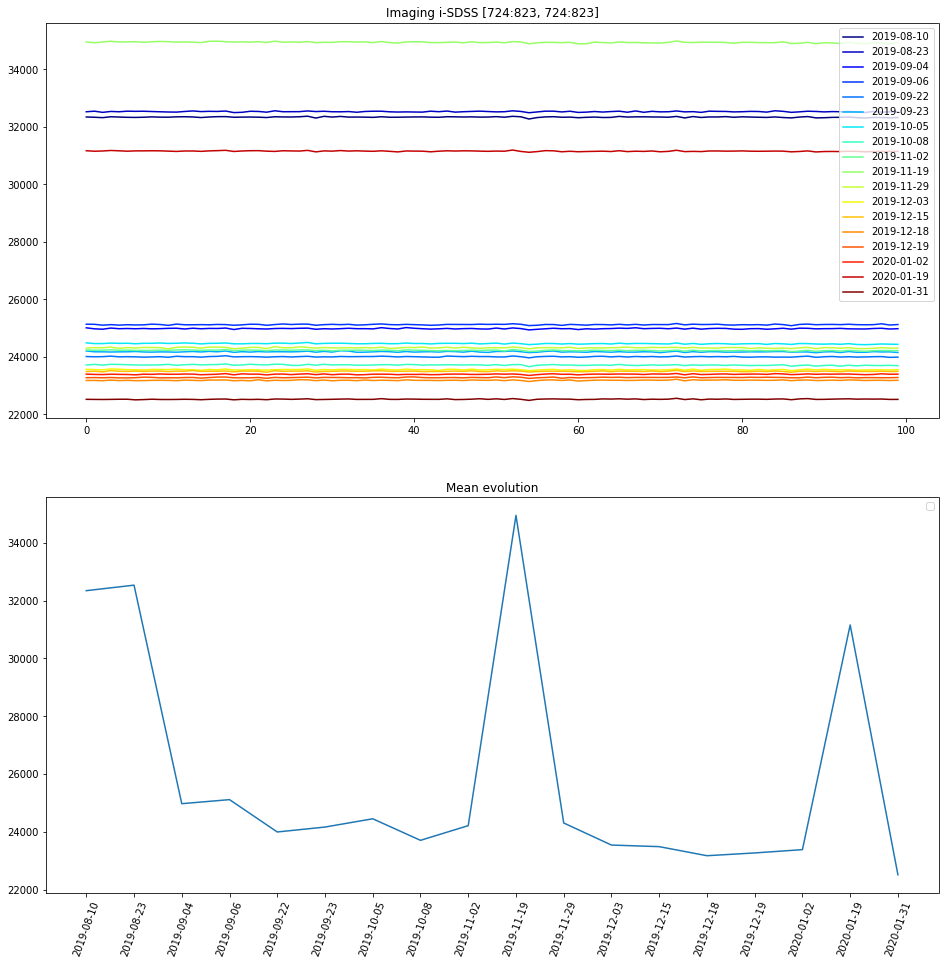

Imaging Master Flats Filter: r-SDSS


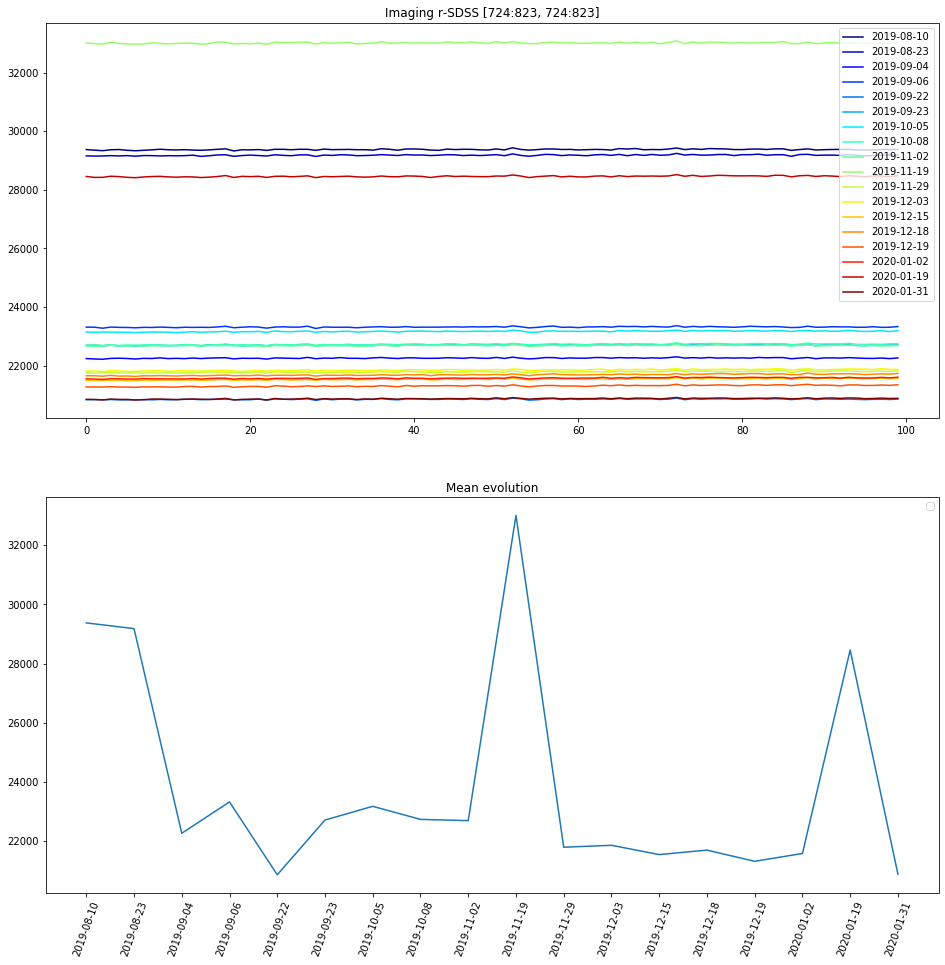

Ignoring file ['/user/simon/data/soar/flat_analisis_2019B/2019-08-06/masters/master_flat_IMAGING_r-SDSS.fits']


In [111]:
cmap = plt.get_cmap('jet')

    
for group in all_groups:
    if len(group) == 1:
        print("Ignoring file {}".format(group.file.unique()))
        continue
    colors = [cmap(i) for i in np.linspace(0, 1, len(group))]
    if group.gsp_tech.unique() == 'Spectroscopy':
        print("Spectroscopy group, Wavmode: {}".format(group.wavmode.unique()[0]))
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,16))
        all_mean_1 = []
        all_mean_2 = []
        all_mean_3 = []
        
        all_dates = []
        for i, _file in enumerate(group.file.tolist()):
            ccd = CCDData.read(_file, unit='adu')
            x, y = ccd.data.shape
            x_0 = int(x / 2.) - 50
            x_1 = int(x / 2.) + 49
            
            y_0 = 1
            y_1 = y
            
            region = "[:, {}:{}]".format(x_0, x_1)
            ccd = image_trim(ccd=ccd, trim_section=region, trim_type='subsection')
            ccd.data = np.mean(ccd.data, axis=0)
            ax1.set_title('Spectroscopy {} {} {}'.format(ccd.header['WAVMODE'], ccd.header['FILTER2'],region))
            ax1.plot(ccd.data, color=colors[i], label=ccd.header['DATE'])
            if ccd.header['WAVMODE'] == '400_M1':
                all_mean_1.append(np.mean(ccd.data[450:550]))
                all_mean_2.append(np.mean(ccd.data[1000:1100]))
                all_mean_3.append(np.mean(ccd.data[1700:1800]))
                all_dates.append(ccd.header['DATE'])
                ax1.axvspan(450, 550, alpha=0.1)
                ax1.axvspan(1000, 1100, alpha=0.1)
                ax1.axvspan(1700, 1800, alpha=0.1)
                
            elif ccd.header['WAVMODE'] == '400_M2':
                all_mean_1.append(np.mean(ccd.data[200:300]))
                all_mean_2.append(np.mean(ccd.data[1000:1100]))
                all_mean_3.append(np.mean(ccd.data[1450:1550]))
                all_dates.append(ccd.header['DATE'])
                ax1.axvspan(200, 300, alpha=0.1)
                ax1.axvspan(1000, 1100, alpha=0.1)
                ax1.axvspan(1450, 1550, alpha=0.1)
            elif ccd.header['WAVMODE'] == '2100_650':
                all_mean_1.append(np.mean(ccd.data[500:600]))
                all_mean_2.append(np.mean(ccd.data[3000:3100]))
                all_mean_3.append(np.mean(ccd.data[3800:3900]))
                all_dates.append(ccd.header['DATE'])
                ax1.axvspan(500, 600, alpha=0.1)
                ax1.axvspan(3000, 3100, alpha=0.1)
                ax1.axvspan(3800, 3900, alpha=0.1)
        ax2.plot(all_dates, all_mean_1, label="Region 1")
        ax2.plot(all_dates, all_mean_2, label="Region 2")
        ax2.plot(all_dates, all_mean_3, label="Region 3")
        ax2.set_title('Mean Evolution')
        for tick in ax2.get_xticklabels():
                tick.set_rotation(70)
        ax1.legend(loc='best')
        ax2.legend(loc='best')
        plt.show()
    else:
        print('Imaging Master Flats Filter: {}'.format(group['filter'].unique()[0]))
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,16))
        all_mean = []
        all_date = []
        for i, _file in enumerate(group.file.tolist()):
            ccd = CCDData.read(_file, unit='adu')
            x, y = ccd.data.shape
            x_0 = int(x / 2.) - 50
            x_1 = int(x / 2.) + 49
            
            y_0 = int(y / 2.) - 50
            y_1 = int(y / 2.) + 49
            
            region = "[{}:{}, {}:{}]".format(y_0, y_1, x_0, x_1)
            ccd = image_trim(ccd=ccd, trim_section=region, trim_type='subsection')
            ccd.data = np.mean(ccd.data, axis=0)
            all_mean.append(np.mean(ccd.data))
            all_date.append(ccd.header['DATE'])
            ax1.set_title('Imaging {} {}'.format(ccd.header['FILTER'], region))
            ax1.plot(ccd.data, color=colors[i], label=ccd.header['DATE'])
        if len(all_date) >0 and len(all_mean) >0:
            ax2.plot(all_date, all_mean)
            ax2.set_title('Mean evolution')
            for tick in ax2.get_xticklabels():
                tick.set_rotation(70)
        ax1.legend(loc='best')
        ax2.legend(loc='best')
        plt.show()